# Fargo Notebook

## Clone the code

In [1]:
example_name = "quickstart"
!mkdir -p $example_name
import os
os.chdir(example_name)

Clone the code, but only the last commit.

In [2]:
!git clone --depth 1 --branch master https://github.com/rometsch/fargocpt/ code

Cloning into 'code'...
remote: Enumerating objects: 698, done.
remote: Counting objects: 100% (698/698), done.
remote: Compressing objects: 100% (576/576), done.
remote: Total 698 (delta 156), reused 509 (delta 97), pack-reused 0
Receiving objects: 100% (698/698), 5.05 MiB | 8.30 MiB/s, done.
Resolving deltas: 100% (156/156), done.


In [2]:
!mkdir code
!cp -r ../../src ../../testconfig.yml ../../bin ../../run_fargo code

## Make the code

In [3]:
%%timeit -n1 -r1
!make -j 4 -C code/src > make.log

45.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Prepare a setup file

In [9]:
configfile = "setup.yml"
!cp code/examples/config.yml $configfile

In [10]:
#!pip install ruamel.yaml
import ruamel.yaml
from pprint import pprint
yaml = ruamel.yaml.YAML()
with open(configfile, "r") as infile:
    config = yaml.load(infile)

In [11]:
config["nbody"][1]["accretion efficiency"] = "2"
config["Ntot"] = 10
config["Ninterm"] = 10
# use very low resolution by setting it to 1 cell per scaleheight, cps
del config["Nrad"]
del config["Nsec"]
config["cps"] = 2

In [12]:
with open(configfile, "w") as outfile:
    yaml.dump(config, outfile)

## Running the code

We can start fargo using the python interface, but this runs slower when started from within a Jupyter Notebook compared to being executed from without.
Even calling a python script using the shell magic "!" does not speed it up.
Calling a python script that does the same job from the command line does not have this issue.

For a production run, even for further testing, please open a terminal and run the output of the following cell:

In [8]:
cwd = os.getcwd()
cmd = f"cd {cwd} && ./code/run_fargo -np 1 -nt 4 start {configfile}"
print(cmd)

cd /home/thomas/repo/fargo/fargocpt/examples/quickstart && ./code/run_fargo -np 1 -nt 4 start setup.yml


In [12]:
!ls output/out

dimensions.dat	      monitor	  snapshots  used_rad.dat
fargocpt_output_v1_2  parameters  units.dat


In [15]:
try:
    print(os.listdir("output/out"))
except FileNotFoundError:
    raise Exception("Please run the simulation first using the command from the last cell")

['monitor', 'parameters', 'snapshots', 'units.dat', 'fargocpt_output_v1_2', 'dimensions.dat', 'used_rad.dat']


In case you really want to run the code in a notebook, uncomment the following cell.

In [16]:
# import sys
# sys.path.append("code/bin")
# from fargocpt import run_fargo
# run_fargo(1, 4, ["start", configfile])

In [17]:
!ls output/out/

dimensions.dat	      monitor	  snapshots  used_rad.dat
fargocpt_output_v1_2  parameters  units.dat


In [18]:
!ls output/out/snapshots

0    14  20  27  33  4	 46  52  59  65  71  78  84  90  97
1    15  21  28  34  40  47  53  6   66  72  79  85  91  98
10   16  22  29  35  41  48  54  60  67  73  8	 86  92  99
100  17  23  3	 36  42  49  55  61  68  74  80  87  93  damping
11   18  24  30  37  43  5   56  62  69  75  81  88  94  list.txt
12   19  25  31  38  44  50  57  63  7	 76  82  89  95  timeSnapshot.dat
13   2	 26  32  39  45  51  58  64  70  77  83  9   96


In [19]:
!ls output/out/snapshots/0

config.yml  misc.bin	   planet1.bin	rebound.bin  vrad.dat
energy.dat  particles.dat  planet2.bin	Sigma.dat    vtheta.dat


In [20]:
!ls output/out/monitor

planet1.dat  planet2.dat  Quantities.dat  timeMonitor.dat  timestepLogging.dat


## Loading data

Let's inspect the monitor quantities that Fargo outputs.
Those are stored in the `monitor` directory within the output dir.

We'll use the `inspect_tab_file.py` tool, which helps navigating the tab separated output files.

Calling this tool with the `monitor/Quantities.dat` file, an overview of the available data is shown.

In [21]:
!code/Tools/inspect_tab_file.py output/out/monitor/Quantities.dat

Available variables:
 0   time step
 1   analysis time step
 2   physical time
 3   mass
 4   radius
 5   angular momentum
 6   total energy
 7   internal energy
 8   kinematic energy
 9   potential energy
10   radial kinetic energy
11   azimuthal kinetic energy
12   eccentricity
13   periastron
14   viscous dissipation
15   luminosity
16   pdivv
17   delta mass inner positive
18   delta mass inner negative
19   delta mass outer positive
20   delta mass outer negative
21   delta mass inner wave damping positive
22   delta mass inner wave damping negative
23   delta mass outer wave damping positive
24   delta mass outer wave damping negative
25   delta mass floor density positive
26   aspect ratio
27   indirect term nbody x
28   indirect term nbody y
29   indirect term disk x
30   indirect term disk y


In [22]:
!code/Tools/inspect_tab_file.py output/out/monitor/Quantities.dat 2 3 --units kyr solMass

         0 kyr	    0.0033 solMass
  0.000173 kyr	   0.00334 solMass
  0.000346 kyr	   0.00341 solMass
  0.000519 kyr	   0.00349 solMass
  0.000692 kyr	   0.00358 solMass
  0.000865 kyr	   0.00368 solMass
   0.00104 kyr	   0.00377 solMass
   0.00121 kyr	   0.00387 solMass
   0.00138 kyr	   0.00396 solMass
   0.00156 kyr	   0.00406 solMass
   0.00173 kyr	   0.00416 solMass
    0.0019 kyr	   0.00425 solMass
   0.00208 kyr	   0.00435 solMass
   0.00225 kyr	   0.00444 solMass
   0.00242 kyr	   0.00454 solMass
   0.00259 kyr	   0.00463 solMass
   0.00277 kyr	   0.00473 solMass
   0.00294 kyr	   0.00482 solMass
   0.00311 kyr	   0.00492 solMass
   0.00329 kyr	   0.00501 solMass
   0.00346 kyr	   0.00511 solMass
   0.00363 kyr	    0.0052 solMass
    0.0038 kyr	    0.0053 solMass
   0.00398 kyr	   0.00539 solMass
   0.00415 kyr	   0.00549 solMass
   0.00432 kyr	   0.00546 solMass
    0.0045 kyr	   0.00536 solMass
   0.00467 kyr	   0.00504 solMass
   0.00484 kyr	   0.00477 solMass
   0.00502 kyr

Now let's use another an external tool to conveniently load data from the simulations output.
Disclaimer, I (Thomas Rometsch) wrote the tool. Feel free to just use `np.genfromtxt` to load the time series data.

We'll first create a Data object and ask what's available in the output. 

In [23]:
#!pip install git+https://github.com/rometsch/disgrid
from disgrid import Data
d = Data("output/out")
d.avail()

{'fluids': {'gas': {'2d': ['dens', 'energy', 'vrad', 'vtheta'],
   'scalar': ['time step',
    'analysis time step',
    'physical time',
    'mass',
    'radius',
    'angular momentum',
    'total energy',
    'internal energy',
    'kinematic energy',
    'potential energy',
    'radial kinetic energy',
    'azimuthal kinetic energy',
    'eccentricity',
    'periastron',
    'viscous dissipation',
    'luminosity',
    'pdivv',
    'delta mass inner positive',
    'delta mass inner negative',
    'delta mass outer positive',
    'delta mass outer negative',
    'delta mass inner wave damping positive',
    'delta mass inner wave damping negative',
    'delta mass outer wave damping positive',
    'delta mass outer wave damping negative',
    'delta mass floor density positive',
    'aspect ratio',
    'indirect term nbody x',
    'indirect term nbody y',
    'indirect term disk x',
    'indirect term disk y',
    'snapshot number',
    'monitor number',
    'hydrostep number',
    

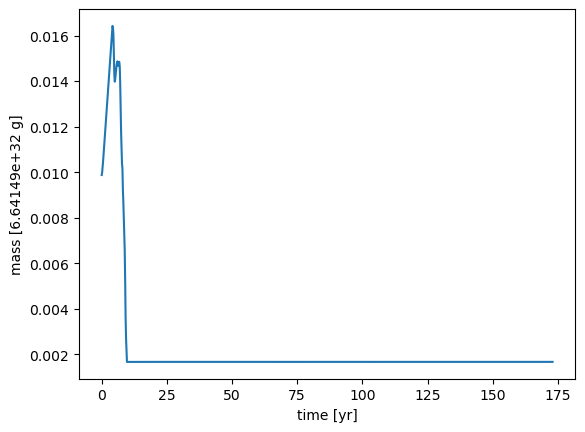

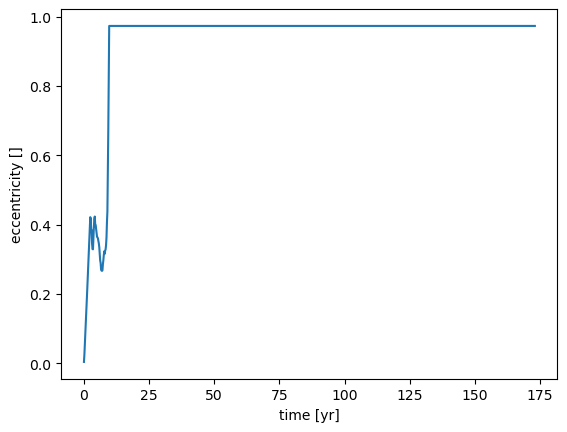

In [24]:
import matplotlib.pyplot as plt

for varname in ["mass", "eccentricity"]:
    fig, ax = plt.subplots()
    x = d.get(dim="scalar", var=varname)
    ax.plot(x.time.to("yr"), x.data)
    ax.set_ylabel(f"{varname} [{x.data.unit}]")
    ax.set_xlabel(f"time [yr]")

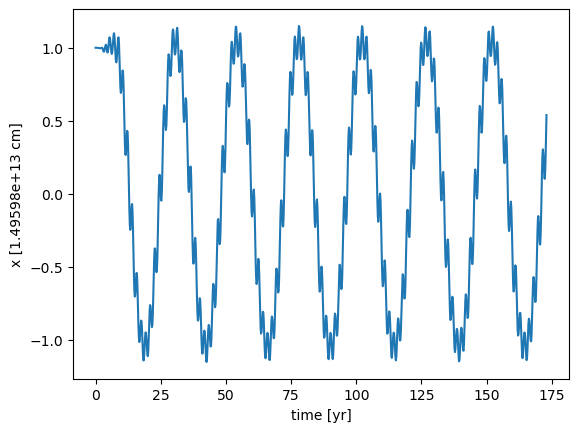

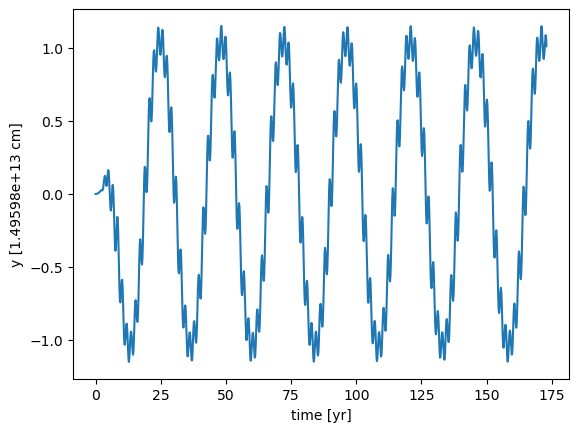

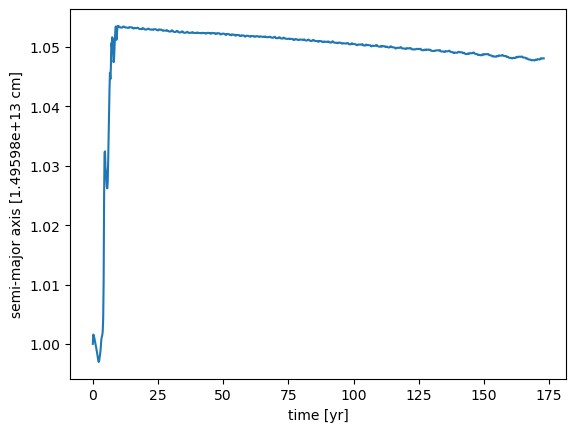

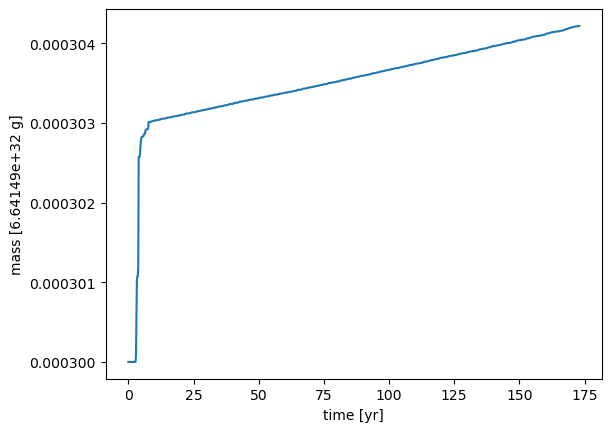

In [25]:
n_planet = 1
for varname in ["x", "y", "semi-major axis", "mass"]:
    fig, ax = plt.subplots()
    x = d.get(dim="scalar", var=varname, planet=n_planet)
    ax.plot(x.time.to("yr"), x.data)
    ax.set_ylabel(f"{varname} [{x.data.unit}]")
    ax.set_xlabel(f"time [yr]")

In [34]:
import numpy as np
import matplotlib.colors as mplcolors

def plot_field(data, name, N, ax=None, dataunit=None, vmin=None, vmax=None, cmap="viridis"):
    field = data.get(var=name, dim="2d", N=N)
    if dataunit is None:
        dataunit = field.data.unit
    Z = field.data.to_value(dataunit)

    ri = field.grid.get_interfaces("r").to_value("au")
    phii = field.grid.get_interfaces("phi").to_value("rad")
    PHI, R = np.meshgrid(phii, ri)
    X = R*np.cos(PHI)
    Y = R*np.sin(PHI)

    if ax is None:
        fig, ax = plt.subplots(dpi=150)
    else:
        fig = ax.get_figure()

    norm = mplcolors.Normalize(vmin=vmin, vmax=vmax)
    pcm = ax.pcolormesh(X,Y,Z, norm=norm, cmap=cmap)
    ax.set_aspect("equal")

    t = field.time.to_value("kyr")
    ax.set_title(f" t={t:.2e}kyr, N={N}")

    cbar = fig.colorbar(pcm, ax=ax)
    cbar.set_label(f"{name} [{dataunit}]")
    
    return fig

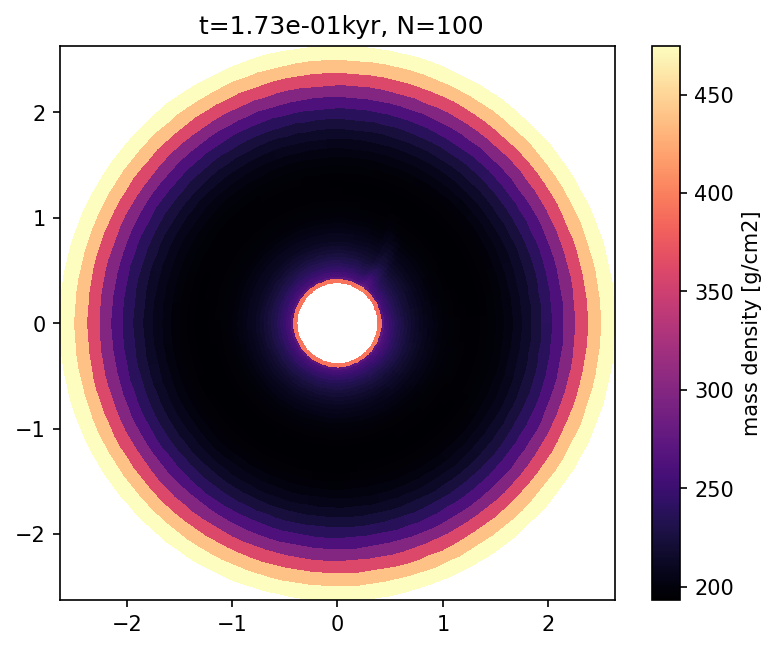

In [35]:
Nlast = d.avail()["Nlast"]
plot_field(d, "mass density", Nlast, dataunit="g/cm2", cmap="magma");

Text(0, 0.5, '$\\Sigma$ [g/cm2]')

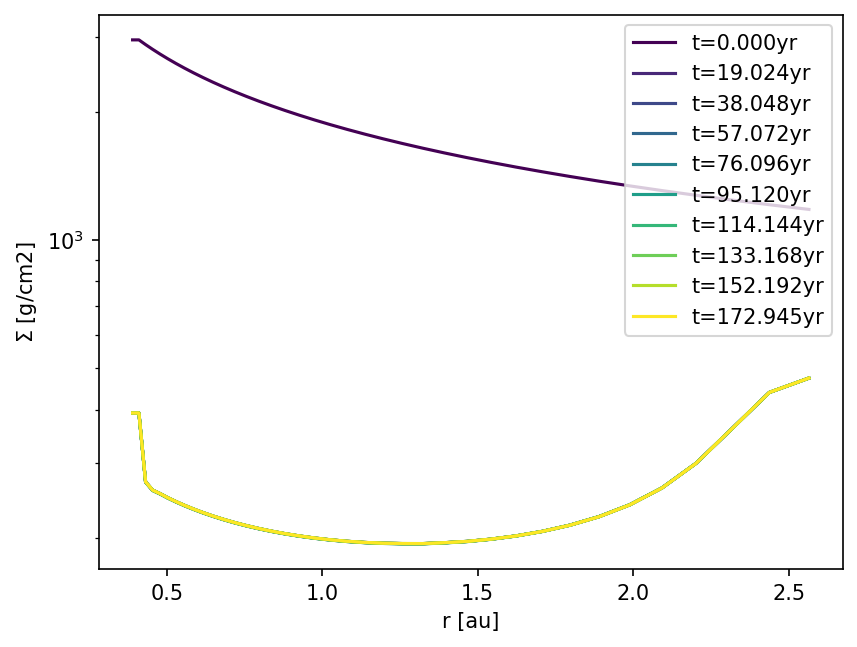

In [37]:
name = "mass density"
dataunit = "g/cm2"

Nfirst = d.avail()["Nfirst"]
Nlast = d.avail()["Nlast"]

fig, ax = plt.subplots(dpi=150)

field = d.get(dim="2d", var="mass density", N=0)
profile0 = np.average(field.data.to_value(dataunit), axis=1)

cmap = plt.cm.get_cmap("viridis")

inds = np.linspace(Nfirst, Nlast, 10, dtype=int)
for k, n in enumerate(inds):
    color = cmap(k/(len(inds)-1))
    
    field = d.get(dim="2d", var="mass density", N=n)
    r = field.grid.get_centers("r").to_value("au")
    Z = field.data.to_value(dataunit)
    
    y = np.average(Z, axis=1)
    
    t = field.time.to_value("yr")
    # ax.plot(r, (profile-profile0)/profile0, label=f"t={t:.3f}yr")
    line, = ax.plot(r, y, label=f"t={t:.3f}yr", color=color)
    
ax.legend()
ax.set_yscale("log")
ax.set_xlabel("r [au]")
ax.set_ylabel(fr"$\Sigma$ [{dataunit}]")